Preprocess 4: Mask
==================

The mask is used to remove regions of the image where the lens and source galaxy are not present, such as the edges 
of the image and potentially within the lensed source's ring (if the lens light is not observed or has been subtracted).

This tutorial creates a mask for your dataset.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

#%matplotlib inline
from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


This tool allows one to mask a bespoke mask for a given image of a strong lens, which is loaded before a
pipeline is run and passed to that pipeline.

Whereas in the previous 3 tutorials we used the data_raw folder of `autolens/propocess`, the mask is generated from
the reduced dataset, so we'll example `Imaging` in the `autolens_workspace/dataset` folder where your dataset reduced
following preprocess tutorials 1-3 should be located.

Setup the path to the autolens_workspace, using the correct path name below.

The `dataset label` is the name of the folder in the `autolens_workspace/dataset` folder and `dataset_name` the 
folder the dataset is stored in, e.g, `/autolens_workspace/dataset/dataset_type/dataset_label/dataset_name`. The mask will be 
output here as `mask.fits`.

In [2]:
dataset_type = "imaging"
dataset_label = "no_lens_light"
dataset_name = "mass_sie__source_sersic"

Returns the path where the mask will be output, which in this case is
`/autolens_workspace/dataset/imaging/no_lens_light/mass_sie__source_sersic`

In [3]:
dataset_path = path.join("dataset", dataset_type, dataset_label, dataset_name)

If you use this tool for your own dataset, you *must* double check this pixel scale is correct!

In [4]:
pixel_scales = 0.1

First, load the image of the dataset, so that the mask can be plotted over the strong lens.

In [5]:
image = al.Array2D.from_fits(
    file_path=path.join(dataset_path, "image.fits"), pixel_scales=pixel_scales
)

Create a mask for this dataset, using the Mask2D object I`ll use a circular-annular mask here, but I`ve commented 
other options you might want to use (feel free to experiment!)

In [6]:
mask = al.Mask2D.circular_annular(
    shape_native=image.shape_native,
    pixel_scales=image.pixel_scales,
    sub_size=1,
    inner_radius=0.5,
    outer_radius=2.5,
    centre=(0.0, 0.0),
)

# mask = al.Mask2D.circular(
#     shape_native=image.shape_native,
#     pixel_scales=image.pixel_scales,
#     sub_size=1,
#     radius=2.5,
#     centre=(0.0, 0.0),
# )

# mask = al.Mask2D.elliptical(
#     shape_native=image.shape_native,
#     pixel_scales=image.pixel_scales,
#     sub_size=1,
#     major_axis_radius=2.5,
#     axis_ratio=0.7,
#     phi=45.0,
#     centre=(0.0, 0.0),
# )

# mask = al.Mask2D.elliptical_annular(
#     shape_native=image.shape_native,
#     pixel_scales=image.pixel_scales,
#     sub_size=1,
#     inner_major_axis_radius=0.5,
#     inner_axis_ratio=0.7,
#     inner_phi=45.0,
#     outer_major_axis_radius=0.5,
#     outer_axis_ratio=0.7,
#     outer_phi=45.0,
#     centre=(0.0, 0.0),
# )

Now lets plot the image and mask, so we can check that the mask includes the regions of the image we want.

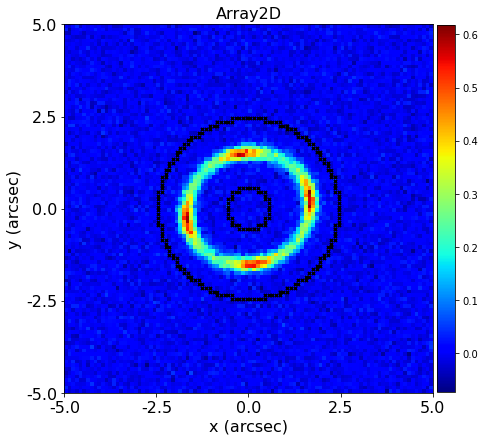

In [7]:
visuals_2d = aplt.Visuals2D(mask=mask)

array_plotter = aplt.Array2DPlotter(array=image, visuals_2d=visuals_2d)
array_plotter.figure()

Now we`re happy with the mask, lets output it to the dataset folder of the lens, so that we can load it from a .fits
file in our pipelines!

In [8]:
mask.output_to_fits(file_path=path.join(dataset_path, "mask.fits"), overwrite=True)

The workspace also includes a GUI for drawing a mask, which can be found at 
`autolens_workspace/notebooks/preprocess/imaging/gui/mask.py`. This tools allows you to draw the mask via a `spray paint` mouse
icon, such that you can draw irregular masks more tailored to the source's light.